# Analyzing [Ford GoBike System](https://s3.amazonaws.com/fordgobike-data/index.html) Data

<span style="color: gray; font-size:1em;">Yousef Al-mutairi</span>
<br><span style="color: gray; font-size:1em;">Jan-2021</span>


## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#gather)
- [Part II - Assessing Data](#assess)
- [Part III - Cleaning Data](#clean)
- [Part IV - Univariate Exploration](#univariate)
- [Part V - Bivariate Exploration](#bivariate)
- [Part VI - Multivariate Exploration](#multivariate)

<a id='intro'></a>
### Introduction

Ford GoBike is a regional public bicycle sharing system in the San Francisco Bay Area, California. Beginning operation in August 2013 as Bay Area Bike Share, the Ford GoBike system currently has over 2,600 bicycles in 262 stations across San Francisco, East Bay and San Jose. On June 28, 2017, the system officially launched as Ford GoBike in a partnership with Ford Motor Company.
<br>
<br>Ford GoBike, like other bike share systems, consists of a fleet of specially designed, sturdy and durable bikes that are locked into a network of docking stations throughout the city. The bikes can be unlocked from one station and returned to any other station in the system, making them ideal for one-way trips. The bikes are available for use 24 hours/day, 7 days/week, 365 days/year and riders have access to all bikes in the network when they become a member or purchase a pass.

### Preliminary Wrangling

This document explores the Ford GoBike's trip data for public containing approximately 1,850,000 bike rides from FY2018.

<a id='gather'></a>
## Part I - Gathering Data

In [68]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob
import os
%matplotlib inline

In [3]:
# load the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv')

<a id='assess'></a>
## Part II - Assessing  Data

In [4]:
# Visually check first 5 records
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#check 50 random records
df.sample(50)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
90449,1097,2019-02-16 12:21:47.0420,2019-02-16 12:40:04.7330,24.0,Spear St at Folsom St,37.789677,-122.390428,98.0,Valencia St at 16th St,37.765052,-122.421866,6139,Subscriber,1991.0,Male,No
83421,98,2019-02-18 00:34:25.2330,2019-02-18 00:36:04.2010,276.0,Julian St at The Alameda,37.332233,-121.912517,277.0,Morrison Ave at Julian St,37.333658,-121.908586,1760,Subscriber,1993.0,Male,Yes
84359,1697,2019-02-17 17:37:44.8130,2019-02-17 18:06:02.0020,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,371.0,Lombard St at Columbus Ave,37.802746,-122.413579,2338,Customer,2000.0,Male,No
120485,550,2019-02-11 16:58:31.0630,2019-02-11 17:07:41.7830,16.0,Steuart St at Market St,37.794130,-122.394430,81.0,Berry St at 4th St,37.775880,-122.393170,5358,Subscriber,1953.0,Male,No
33763,437,2019-02-24 10:44:25.5760,2019-02-24 10:51:43.1880,246.0,Berkeley Civic Center,37.869060,-122.270556,385.0,Woolsey St at Sacramento St,37.850578,-122.278175,4688,Subscriber,1993.0,Male,No
35924,494,2019-02-23 17:25:29.1770,2019-02-23 17:33:43.8430,280.0,San Fernando St at 7th St,37.337122,-121.883215,296.0,5th St at Virginia St,37.325998,-121.877120,3841,Subscriber,1996.0,Female,Yes
24576,1435,2019-02-25 17:47:37.2850,2019-02-25 18:11:32.5330,155.0,Emeryville Public Market,37.840521,-122.293528,243.0,Bancroft Way at College Ave,37.869360,-122.254337,4498,Subscriber,1992.0,Male,No
175533,1082,2019-02-02 13:57:34.8890,2019-02-02 14:15:37.0890,239.0,Bancroft Way at Telegraph Ave,37.868813,-122.258764,249.0,Russell St at College Ave,37.858473,-122.253253,5435,Subscriber,1995.0,Male,Yes
74096,1116,2019-02-19 11:26:28.9840,2019-02-19 11:45:05.5810,10.0,Washington St at Kearny St,37.795393,-122.404770,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,6579,Subscriber,1947.0,Male,Yes
31796,241,2019-02-24 15:57:23.5810,2019-02-24 16:01:25.2440,50.0,2nd St at Townsend St,37.780526,-122.390288,64.0,5th St at Brannan St,37.776754,-122.399018,5234,Subscriber,1989.0,Male,No


In [6]:
# View info of the df
df.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [7]:
# Check duplicates
df.duplicated().sum()

0

In [8]:
# View descriptive statistics of the df
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<a id='issues'></a>
**Quality and Data issues**
 * 1 - 'start_time' and 'end_time' should be timestamps rather than object .
 * 2 - ('user_type', 'gender', 'bike_share_for_all_trip') should be set to object datatype.
 * 3 - ('bike_id', 'start_station_id', 'end_station_id') should be object datatype.
 * 4 - ('member_birth_year') contains dates to 1900.
 * 5 - we should calculate the age of the user
 * 6 - we are able to enhance the dataset with more details like ( month,day,hour,weekday)
 * 7 - we are able to calculate the distance of rides between stations . 

<a id='clean'></a>
## Part III - Cleaning Data

In [9]:
# Create copy of original DF
df_clean = df.copy()

**Define**
<br>Set appropriate data types for fields mentioned in the [Quality and Data issues](#issues)

**Code**

In [10]:
# change dates datatypes to timestamps datatype
df_clean.start_time = pd.to_datetime(df_clean.start_time)
df_clean.end_time = pd.to_datetime(df_clean.end_time)

In [13]:
# change user_type, gender , bike_share_for_all_trip to category datatype
df_clean.user_type = df_clean.user_type.astype('category')
df_clean.member_gender = df_clean.member_gender.astype('category')
df_clean.bike_share_for_all_trip = df_clean.bike_share_for_all_trip.astype('category')

In [12]:
# change bike_id, start_station_id, end_station_id to object datatype
df_clean.bike_id = df_clean.bike_id.astype(str)
df_clean.start_station_id = df_clean.bike_id.astype(str)
df_clean.end_station_id = df_clean.bike_id.astype(str)

**Test**

In [14]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183412 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  float64       
 6   start_station_longitude  183412 non-null  float64       
 7   end_station_id           183412 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  float64       
 10  end_station_longitude    183412 non-null  float64       
 11  bike_id                  183412 non-null  object        
 12  user_type       

**Define**
<br>Calculate the age of the member

**Code**

In [15]:
# substract the birth year from the current year
df_clean['member_age'] = 2021-df_clean['member_birth_year']

**Test**

In [16]:
df_clean.head(20)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,37.0
1,42521,2019-02-28 18:53:21.789,2019-03-01 06:42:03.056,2535,The Embarcadero at Steuart St,37.791464,-122.391034,2535,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No,NaN
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,49.0
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,32.0
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,47.0
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,5200,4th St at Mission Bay Blvd S,37.770407,-122.391198,5200,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,62.0
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,3803,Palm St at Willow St,37.317298,-121.884995,3803,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No,38.0
7,1615,2019-02-28 23:41:06.766,2019-03-01 00:08:02.756,6329,Washington St at Kearny St,37.795393,-122.404770,6329,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No,32.0
8,1570,2019-02-28 23:41:48.790,2019-03-01 00:07:59.715,6548,Washington St at Kearny St,37.795393,-122.404770,6548,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No,33.0
9,1049,2019-02-28 23:49:47.699,2019-03-01 00:07:17.025,6488,Post St at Kearny St,37.788975,-122.403452,6488,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No,29.0


**Define**
<br>Enhance dataset with new date related fields

**Code**

In [35]:
# get start_time month name
df_clean['start_time_month_name']=df_clean['start_time'].dt.strftime('%B')

In [36]:
# get start time month number
df_clean['start_time_month']=df_clean['start_time'].dt.month.astype(int)

In [37]:
# get start time weekdays
df_clean['start_time_weekday']=df_clean['start_time'].dt.strftime('%a')

In [38]:
# get start time day
df_clean['start_time_day']=df_clean['start_time'].dt.day.astype(int)

In [39]:
# get start time hour
df_clean['start_time_hour']=df_clean['start_time'].dt.hour

**Test**

In [41]:
df_clean.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,...,user_type,member_birth_year,member_gender,bike_share_for_all_trip,member_age,start_time_month_name,start_time_month,start_time_weekday,start_time_day,start_time_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,4902,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,4902,Commercial St at Montgomery St,37.794231,...,Customer,1984,Male,No,37,February,2,Thu,28,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,5905,Market St at Dolores St,37.769305,-122.426826,5905,Powell St BART Station (Market St at 4th St),37.786375,...,Customer,1972,Male,No,49,February,2,Thu,28,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,6638,Grove St at Masonic Ave,37.774836,-122.446546,6638,Central Ave at Fell St,37.773311,...,Subscriber,1989,Other,No,32,February,2,Thu,28,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,4898,Frank H Ogawa Plaza,37.804562,-122.271738,4898,10th Ave at E 15th St,37.792714,...,Subscriber,1974,Male,Yes,47,February,2,Thu,28,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,3803,Palm St at Willow St,37.317298,-121.884995,3803,San Jose Diridon Station,37.329732,...,Subscriber,1983,Female,No,38,February,2,Thu,28,23


In [42]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170186 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170186 non-null  int64         
 1   start_time               170186 non-null  datetime64[ns]
 2   end_time                 170186 non-null  datetime64[ns]
 3   start_station_id         170186 non-null  object        
 4   start_station_name       169992 non-null  object        
 5   start_station_latitude   170186 non-null  float64       
 6   start_station_longitude  170186 non-null  float64       
 7   end_station_id           170186 non-null  object        
 8   end_station_name         169992 non-null  object        
 9   end_station_latitude     170186 non-null  float64       
 10  end_station_longitude    170186 non-null  float64       
 11  bike_id                  170186 non-null  object        
 12  user_type       

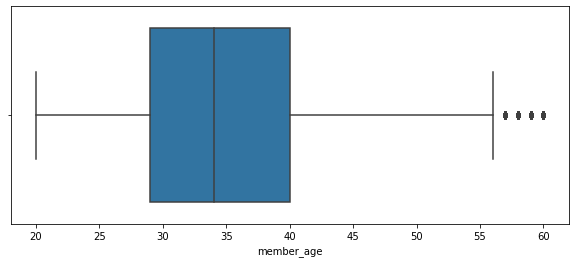

In [43]:
#plotting age by using boxplot

plt.figure(figsize = [10, 4])
base_color = sns.color_palette()[0]
sns.boxplot(data=df_clean, x='member_age', color=base_color);

In [44]:
df_clean.member_age.mean()

35.30287450201544

In [45]:
df_clean.member_age.describe(percentiles = [ .95])

count    170186.000000
mean         35.302875
std           8.668740
min          20.000000
50%          34.000000
95%          53.000000
max          60.000000
Name: member_age, dtype: float64

**Define**
<br>
As mentioned in the [Quality and Data issues](#issues), there are customers that their birth date bofore 1900 , hence customers with age above 100 years will be removed . with 95% of the users are below 58 , i will keep users below 60 years old and drop the left.

**Code**

In [46]:
# Keep Ages that are below 60 Years old, it automatically removes null values
df_clean = df_clean.query('member_age <=60')

In [47]:
# change age and birth year datatype to integer(int) datatype
df_clean.member_age = df_clean.member_age.astype(int)
df_clean.member_birth_year = df_clean.member_birth_year.astype(int)

**Test**

In [48]:
df_clean.describe()

,duration_sec,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,member_birth_year,member_age,start_time_month,start_time_day,start_time_hour
count,170186.000000,170186.000000,170186.000000,170186.000000,170186.000000,170186.000000,170186.000000,170186.0,170186.000000,170186.000000
mean,703.280205,37.770812,-122.351302,37.771001,-122.350860,1985.697125,35.302875,2.0,15.310472,13.472130
std,1659.992807,0.101148,0.118484,0.101057,0.118044,8.668740,8.668740,0.0,8.035610,4.743455
min,61.000000,37.317298,-122.453704,37.317298,-122.453704,1961.000000,20.000000,2.0,1.000000,0.000000
25%,323.000000,37.770083,-122.411901,37.770407,-122.411647,1981.000000,29.000000,2.0,8.000000,9.000000
50%,509.000000,37.780760,-122.398279,37.781010,-122.397437,1987.000000,34.000000,2.0,15.000000,14.000000
75%,786.000000,37.797320,-122.282497,37.797673,-122.285171,1992.000000,40.000000,2.0,22.000000,17.000000
max,84548.000000,37.880222,-121.874119,37.880222,-121.874119,2001.000000,60.000000,2.0,28.000000,23.000000


In [49]:
df_clean.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170186 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             170186 non-null  int64         
 1   start_time               170186 non-null  datetime64[ns]
 2   end_time                 170186 non-null  datetime64[ns]
 3   start_station_id         170186 non-null  object        
 4   start_station_name       169992 non-null  object        
 5   start_station_latitude   170186 non-null  float64       
 6   start_station_longitude  170186 non-null  float64       
 7   end_station_id           170186 non-null  object        
 8   end_station_name         169992 non-null  object        
 9   end_station_latitude     170186 non-null  float64       
 10  end_station_longitude    170186 non-null  float64       
 11  bike_id                  170186 non-null  object        
 12  user_type       

In [50]:
# save enhanced and cleaned data 
df_clean.to_csv('enhanced_master_file.csv', index=False)

### What is the structure of your dataset?

##### Originally there were approx. 185,000 bike rides that happen in 2018 in the San Francisco Bay Area. The dataset 

##### Data contained informations about :

 * 1 - trip duration(start/end) Time . how long is tha trip in seconds.
 * 2 - stations(start/end) station, Name of the station, Geolocation (latitude/longitude)
 * 3 - Customer data(gender, birth_date, user_type)

##### the dataset was enhanced for a better analysis results :
 * 1 - Rental time(month,day,hour) , weekday(start_time,end_time,date)
 * 2 - customer age : there was customers are with birth date of 1900 , removed who above 60 years old because of 95%        of the customers are below 60.
 

### What is/are the main feature(s) of interest in your dataset?

i will start by asking diffrent questions and try to answer them by analize the dataset.

Question 1 : when and where bikes are in high demand ? (during the day/weekday/month).

Question 2 : age range and gender uses the service the most ?

Question 3 : services mostly used by members or casual riders ?


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

debends on my questions the features i care about the most are 

 1 - start time will be the most important as well as the customer related data.
 2 - location and datetime have the strongest effect on knowing when the demands are high or low and in which location .


<a id='univariate'></a>
## Part IV - Univariate Exploration

Firt step will be taken as below
 1 - looking at the monthly trend of number of bike rentals and distribution of weekdays and hours day.
 2 - explore duration of the rtip .

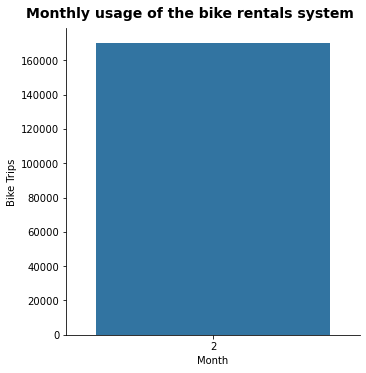

In [55]:
#Monthly usage of the bike rentals system
plt = sns.catplot(data=df_clean, x='start_time_month', kind='count', color = base_color)
plt.set_axis_labels("Month", "Bike Trips")
plt.fig.suptitle('Monthly usage of the bike rentals system', y=1.03, fontsize=14, fontweight='semibold');

Maybe there is an error of the month entry in this dataset it's imposibble to rentals to be only in one month which is 	February

i will continue my project as normal and note this problem to udacity review team at project submiting

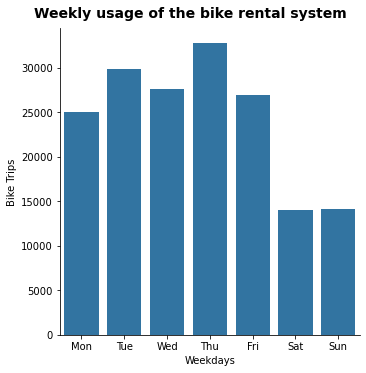

In [54]:
# weekday usege of the bike sharing system
weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt = sns.catplot(data=df_clean, x='start_time_weekday', kind='count', color = base_color, order = weekday)
plt.set_axis_labels("Weekdays", "Bike Trips")
plt.fig.suptitle('Weekly usage of the bike rental system', y=1.03, fontsize=14, fontweight='semibold');

Observations 

the bike rentals are high in thuesday and thursday .
thus the bike rentals are used for a daily work/school attend.


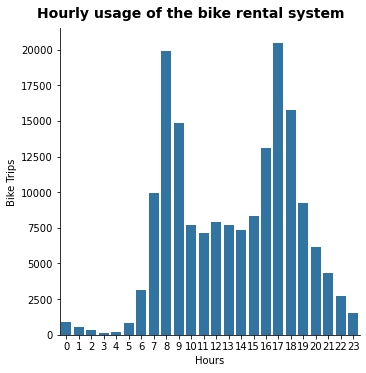

In [56]:
# hourly usege of the bike rental system
plt = sns.catplot(data=df_clean, x='start_time_hour', kind='count', color = base_color)
plt.set_axis_labels("Hours", "Bike Trips")
plt.fig.suptitle('Hourly usage of the bike rental system', y=1.03, fontsize=14, fontweight='semibold');

Obaservations
1 - the hourly distribution is biomodal
2 - the rental is mainly around 8-9am and 5-6pm , it's when people get to work and back from work

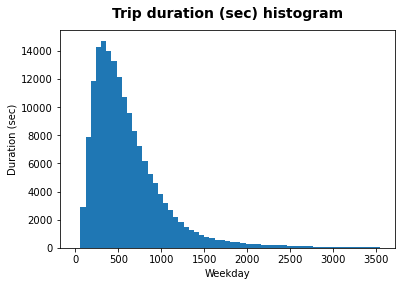

In [60]:
bin_edges = np.arange(0, 3600,60)

plt.hist(data = df_clean, x = 'duration_sec', bins = bin_edges)
plt.title("Trip duration (sec) histogram", y=1.03, fontsize=14, fontweight='semibold')
plt.xlabel('Weekday')
plt.ylabel('Duration (sec)');

Observations

 1 - trip durations are not longer than 30(min) and usually last 6 to 15min

 


### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>there was one unusal point 
 1 - there is some trips lasted more than 24h , i have set the max range to 3600 sec = 60 min =  1 hour

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> there was one unusal distribution 
 1 - customers age , there is some dated before 1900 , since 95% of the members are below 60 , i removed who older than 60 years old


<a id='bivariate'></a>
## Part V - Bivariate Exploration

In this section I will further explore the dataset by adding the customer type to the analysis.

In [61]:
# calculating % split for the user type
customer = df_clean.query('user_type == "Customer"')['bike_id'].count()
subscriber = df_clean.query('user_type == "Subscriber"')['bike_id'].count()

customer_proportion = customer / df_clean['bike_id'].count()
subscriber_proportion = subscriber / df_clean['bike_id'].count()

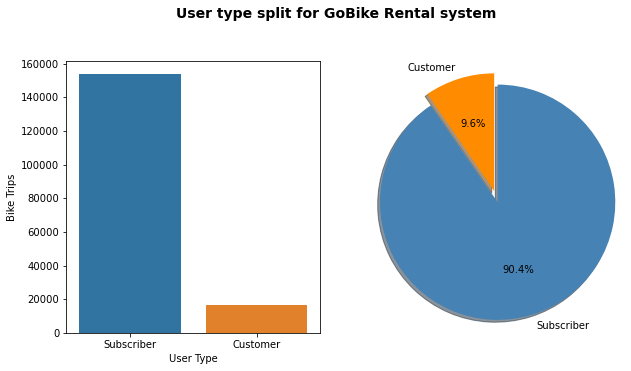

In [62]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

g = sns.countplot(data=df_clean, x="user_type", order=df_clean.user_type.value_counts().index)
g.set_xlabel('User Type')
g.set_ylabel('Bike Trips')

# code for the pie chart
plt.subplot(1, 2, 2)

labels = ['Customer', 'Subscriber']
sizes = [customer_proportion, subscriber_proportion]
colors = ['darkorange', 'steelblue']
explode = (0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors = colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')

plt.suptitle('User type split for GoBike Rental system', y=1.03, fontsize=14, fontweight='semibold');

observations 
<br>
 1- 9.6% are customers
 <br>
 2 - 90.4% are subscriber

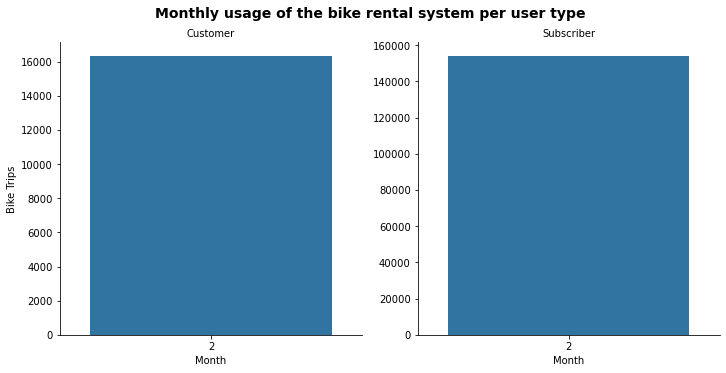

In [63]:
# monthly usege of the bike rental system per user type
plt = sns.catplot(data=df_clean, x='start_time_month', col="user_type", kind='count', sharey = False,
            color = base_color)
plt.set_axis_labels("Month", "Bike Trips")
plt.set_titles("{col_name}")
plt.fig.suptitle('Monthly usage of the bike rental system per user type', y=1.03, fontsize=14, fontweight='semibold');

as mentioned monthly analsys will not work , due to miss-entry of data , i will be graphing the months only for educational purposes

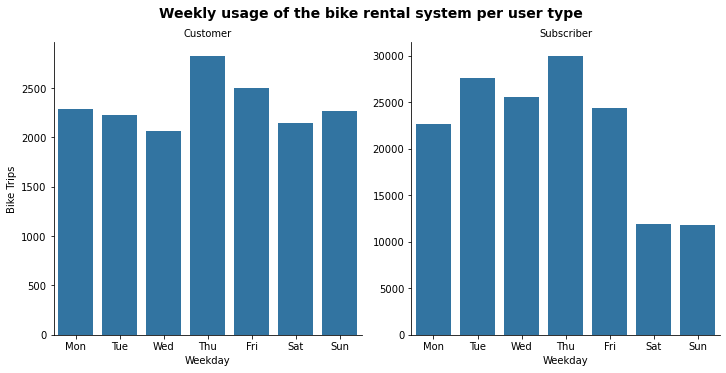

In [64]:
# weekday usege of the bike rental system per user type

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", kind='count', sharey = False,
            color = base_color, order = weekday)
plt.set_axis_labels("Weekday", "Bike Trips")
plt.set_titles("{col_name}")
plt.fig.suptitle('Weekly usage of the bike rental system per user type', y=1.03, fontsize=14, fontweight='semibold');

Observations 

  - Customers 
   1 - they are probably occasional riders and tourist who rent bikes for holidays or weekend trips .

  - subscribers 
   1 - they are casual workers uses bikes to ethier go to work or out , school or out .
<br>
<br>Next, I am going to check when within a day bikes are high in demand.

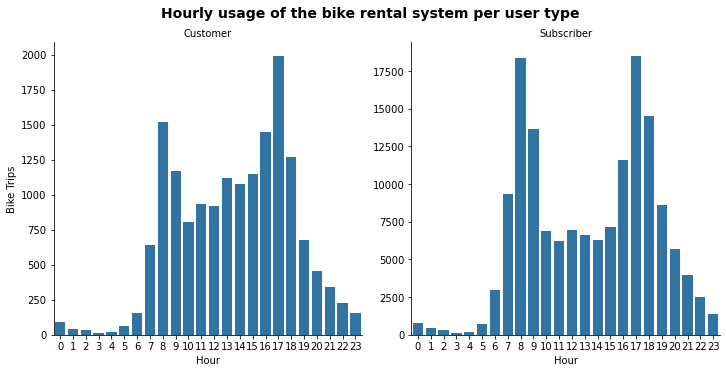

In [65]:
# hourly usege of the bike rental system per user type

plt = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", kind='count', sharey = False,
            color = base_color)
plt.set_axis_labels("Hour", "Bike Trips")
plt.set_titles("{col_name}")
plt.fig.suptitle('Hourly usage of the bike rental system per user type', y=1.03, fontsize=14, fontweight='semibold');

observations 

 - customers 
  1 - mainly between 4pm-6pm , as chillig trip i guess , having a great weather why not ride a pike .

 - subscriber 
  1 - mainly between 7am-9am , go to work time , and 4pm-6pm back from work time .
<br>
<br>Next, I am going to check how the trip duration varies between customers and subscribers.

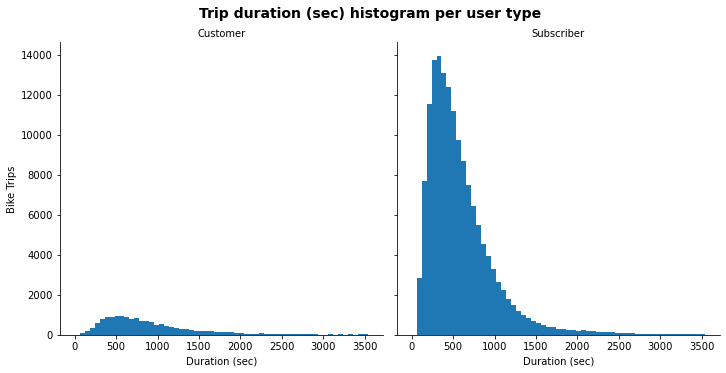

In [69]:
# code for the (histogram) duration (sec) distribution per user type

histogram_plt = sns.FacetGrid(df_clean, col="user_type", margin_titles=True, size=5)
bin_edges = np.arange(0, 3600,60)
histogram_plt.map(plt.hist, "duration_sec", color=base_color, bins=bin_edges)
histogram_plt.set_axis_labels("Duration (sec)", "Bike Trips")
histogram_plt.set_titles(col_template = '{col_name}')
histogram_plt.fig.suptitle('Trip duration (sec) histogram per user type', y=1.03, fontsize=14, fontweight='semibold');

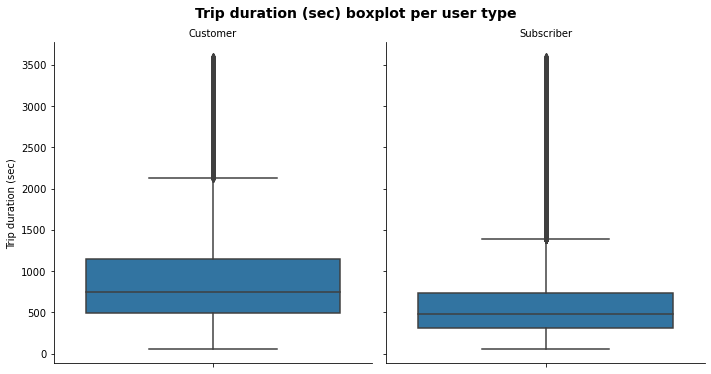

In [70]:
# code for the (boxplot) duration (sec) distribution per user type

data = df_clean.query('duration_sec < 3600')
box_plot = sns.catplot(data=data, y='duration_sec', col="user_type", kind='box',
            color = base_color)
box_plot.set_titles(col_template = '{col_name}')
box_plot.set_axis_labels("", "Trip duration (sec)")
box_plot.fig.suptitle('Trip duration (sec) boxplot per user type', y=1.03, fontsize=14, fontweight='semibold');

observations 
 
 1- durations are longer for customers (9 to 23 minutes)

 2 - subscribers are shorter than customers ( 7 to 13 minutes)



### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> by adding the user_type we found that
 
 1 - customer behavior of renting is for tourists and during weekends than weekdays

 2 - subscriber behavior of renting is for tyipcal ride to work or school and high during weekdays (workdays)



### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> customers are higher than subscirber duration of trip , thats because they prefr bike rides arround weekends and going around the area with a pike as part of enjoyment

<a id='multivariate'></a>
## Part VI - Multivariate Exploration

In this section I will further explore the dataset by adding gender to the customer type and check the hourly distribution of bike rides during weekdays for customers and subscribers.

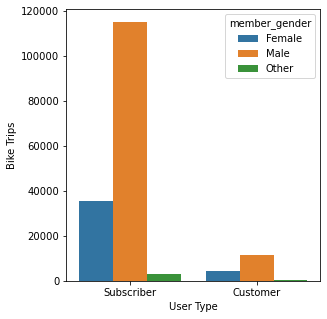

In [71]:
plt.figure(figsize = [10, 5])

# code for the bar chart
plt.subplot(1, 2, 1)

graph_plt = sns.countplot(data=df_clean, x="user_type", hue="member_gender", order=df_clean.user_type.value_counts().index)
graph_plt.set_xlabel('User Type')
graph_plt.set_ylabel('Bike Trips');

observations 

 1 - males are using the system more often than femals and others .
 2 - the ratio between customer male and female is much smaller then subscribers males and females .
<br>
<br>Let's explore if gender affects the way the bike system is used within a year, weekdays and hours of the day.

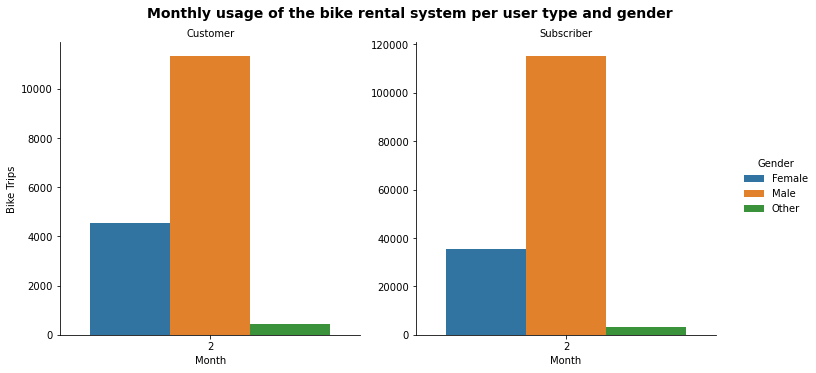

In [72]:
# monthly usege of the bike rental system per user type and gender

graph_plt = sns.catplot(data=df_clean, x='start_time_month', col="user_type", hue="member_gender", kind='count', sharey = False)
graph_plt.set_axis_labels("Month", "Bike Trips")
graph_plt._legend.set_title('Gender')
graph_plt.set_titles("{col_name}")
graph_plt.fig.suptitle('Monthly usage of the bike rental system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

educational purpose of using month graph .

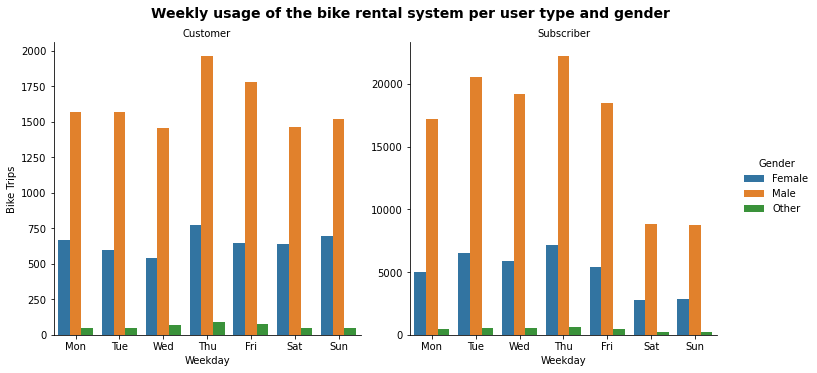

In [73]:
# weekday usege of the bike rental system per user type and gender

weekday = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
graph_plt = sns.catplot(data=df_clean, x='start_time_weekday', col="user_type", hue='member_gender', kind='count', sharey = False,
                order = weekday)
graph_plt.set_axis_labels("Weekday", "Bike Trips")
graph_plt._legend.set_title('Gender')
graph_plt.set_titles("{col_name}")
graph_plt.fig.suptitle('Weekly usage of the bike rental system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

same as the trend above , males are higher than females .

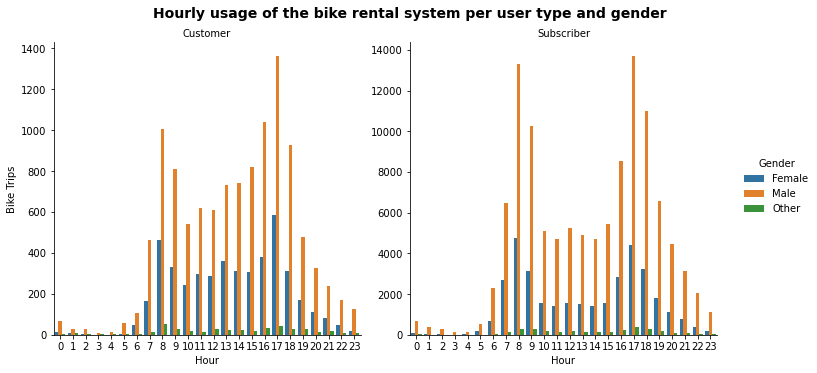

In [74]:
# hourly usege of the bike sharing system per user type and gender

graph_plt = sns.catplot(data=df_clean, x='start_time_hour', col="user_type", hue='member_gender', kind='count', sharey = False)
graph_plt.set_axis_labels("Hour", "Bike Trips")
graph_plt._legend.set_title('Gender')
graph_plt.set_titles("{col_name}")
graph_plt.fig.suptitle('Hourly usage of the bike rental system per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

observations

 1 - both males and females uses the system the same way

 1 - customers use bikes between 8-am-7pm

 2 - subscribers use bikes between 8-9am and 5-6pm .

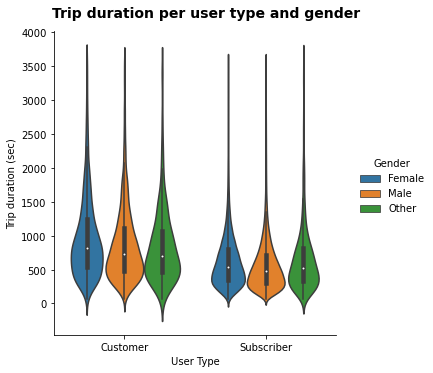

In [75]:
# code for the (violinplot) duration (sec) distribution per user type and gender

graph_plt = sns.catplot(data=data, x='user_type', y="duration_sec", hue="member_gender", kind="violin")

graph_plt.set_axis_labels("User Type", "Trip duration (sec)")
graph_plt._legend.set_title('Gender')
graph_plt.fig.suptitle('Trip duration per user type and gender', y=1.03, fontsize=14, fontweight='semibold');

observations 

 1 - females takes longer trips than males 


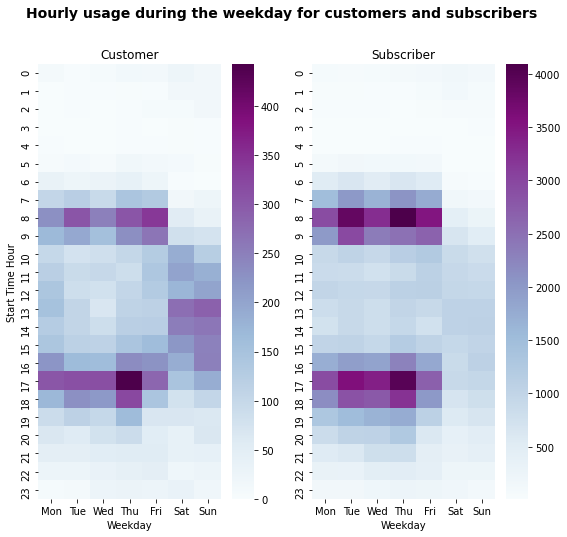

In [76]:
# Setting the weekday order
df_clean['start_time_weekday'] = pd.Categorical(df_clean['start_time_weekday'], 
                                                categories=['Mon','Tue','Wed','Thu','Fri','Sat', 'Sun'], 
                                                ordered=True)
plt.figure(figsize=(9,8))
plt.suptitle('Hourly usage during the weekday for customers and subscribers', fontsize=14, fontweight='semibold')

# heatmap for customers
plt.subplot(1, 2, 1)
df_customer = df_clean.query('user_type == "Customer"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_customer = df_customer.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_customer, cmap="BuPu")

plt.title("Customer", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('Start Time Hour')

# heatmap for subscribers
plt.subplot(1, 2, 2)
df_subscriber = df_clean.query('user_type == "Subscriber"').groupby(["start_time_hour", "start_time_weekday"])["bike_id"].size().reset_index()
df_subscriber = df_subscriber.pivot("start_time_hour", "start_time_weekday", "bike_id")
sns.heatmap(df_subscriber, cmap="BuPu")

plt.title("Subscriber", y=1.015)
plt.xlabel('Weekday')
plt.ylabel('');

observations 

  - Customers
    1 - weekdays : most bike rides ocurr around 4pm-6pm and 7am-9am , with peak on thursday
    1 - weekends : most bike rides occurr around 1pm-4pm with peak on sundays .

  - subscribers
    1 - weekdays : most bike rides ocurr around 8-9am and 4-6pm peak on thursday .
    2 - weekends : rarely but peak on saturday .

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> plotting a heatmap can describe the behavior of rental of bikes , we can see that for customers some of them uses the bikes for work because of rental time interval but they also rent bikes and take more time at trips so there is a small probablity of using bike as a customer to go to work .
in the other hand it shows that subscribers really uses the bikes for only work or school , as noticed from the intrevals when they rent a bike , and its much smalle rate of rent at weekends than weekdays so subscribers really hated bikes they take the weekend as off-days of riding bikes .

### Were there any interesting or surprising interactions between features?

> that females take longer trips than males , thats nice really , but it means 2 things , the females dont like the work so they come up later than men , or they are too slow .